In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
curated = pd.read_csv("../../data/3. curated/curated.csv", index_col=0)
curated.head(3)

,suburbs,housing: type,year groups,economic: median income,economic: median age of earners,economic: top 1% suburb,economic: gini coefficient,economic: top 5% suburb,economic: trimmed mean quarterly,economic: variable interest rate,...,housing: median growth avg,housing: previous growth,housing: previous price,housing: previous count,housing: previous count growth,housing: previous growth avg,distance: crow distance to cbd,distance: distance to cbd,distance: crow distance to cbd inv,distance: distance to cbd inv
0,Albert Park-Middle Park-West St Kilda,flat,2.0,63415.3,39.8,14.55,0.5565,30.75,0.675,6.3825,...,0.048400,NaN,NaN,NaN,NaN,NaN,4.535857,6702.5,0.081735,0.211996
1,Albert Park-Middle Park-West St Kilda,flat,3.0,63415.3,39.8,14.55,0.5565,30.75,0.675,6.6325,...,0.024650,0.096561,296.25,3295.0,NaN,0.04840,4.535857,6702.5,0.081735,0.211996
2,Albert Park-Middle Park-West St Kilda,flat,4.0,63415.3,39.8,14.55,0.5565,30.75,0.675,7.0700,...,0.015623,0.000478,295.00,3319.0,0.0073,0.02465,4.535857,6702.5,0.081735,0.211996


In [25]:
COLORS =["orangered", "blue"]

In [5]:
def get_filtered(df, type=False, suburb = False):
    # create the default mask
    type_mask = pd.Series(True, index=df.index)

    if (type):
        type_mask = type_mask & (df["housing: type"] == type)
    if (suburb):
        type_mask = type_mask & (df["suburbs"] == suburb)
    
    return df[type_mask]

In [6]:
# filter it to be with a higher count
filtered_suburbs = curated["suburbs"]#[historic["housing: count"] < 40]
suburbs = sorted(list(set(filtered_suburbs.values)))

# get the counts for each suburb
counts = curated.groupby("suburbs")["housing: count"].apply(lambda x: x.mean())

In [7]:
# get the mean
inflation_ratio = curated["housing: median growth"].mean() / curated["economic: trimmed mean quarterly"].mean()
gdp_ratio = curated["housing: median growth"].mean() / curated["economic: gdp per capita quarterly"].mean()

# get each flat and suburb combo
def plot_suburb(suburb, thresh, columns=False, show=True, save=True):
    # get the suburb df
    suburb_df = curated[curated["suburbs"] == suburb]

    # create a new plot and announce
    plt.figure()
    print("have chosen suburb: ", suburb)

    # plot the suburb stuff
    for i, type in enumerate(["house", "flat"]):
        historic_suburb = get_filtered(suburb_df, type=type, suburb=suburb)
        
        if (historic_suburb.shape[0] == 0):
            continue

        # get the average count
        count = round(historic_suburb["housing: count"].sum() / historic_suburb.shape[0])

        if (count < thresh):
            continue

        # plot the value
        x = historic_suburb["year groups"].values
        y = historic_suburb["housing: median growth avg"].values

        plt.plot(x, y, label=f"{type} ({count})", color=COLORS[i])

    # get columns to add to plot
    if (columns):
        for column in columns:
            # get the suburb df for plotting
            suburb_column_plot = suburb_df.drop_duplicates(subset="year groups").sort_values(by = "year groups")
            x = suburb_column_plot["year groups"].values

            # get the ratio to bring into focus and y values
            #column_ratio = suburb_df["housing: median growth"].mean() / suburb_df[column].mean()
            y = suburb_column_plot[column].values# * column_ratio

            # plot including the ratio used
            if ("population" in column and "growth" in column):
                mean_count = suburb_df[column[:-7]].mean()
                label = f"{column} {mean_count:.0f}" #{column_ratio:.2f}"
            else:
                label = f"{column}"# {column_ratio:.2f}"

            plt.plot(x, y, label=label)

    # get the legend and limits
    plt.legend()
    plt.ylim((-0.4, 0.4))
    plt.xlim((0, 25))

    # get the graphing info
    plt.title(f"Median Growth of {suburb} by dwelling type")
    plt.ylabel("Median growth price (% difference)")
    plt.xlabel("year")

    # saving and stuff
    if (save):
        plt.savefig(f"suburbs folder merged avg/{suburb} growth rate.png", facecolor='white')

    if (show):
        plt.show()
    plt.close()

### actually plotting

30 have chosen suburb:  Caulfield


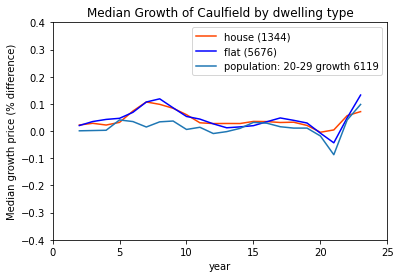

31 have chosen suburb:  Chadstone-Oakleigh


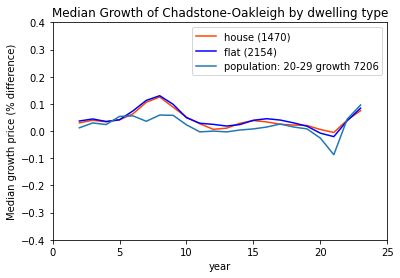

32 have chosen suburb:  Cheltenham


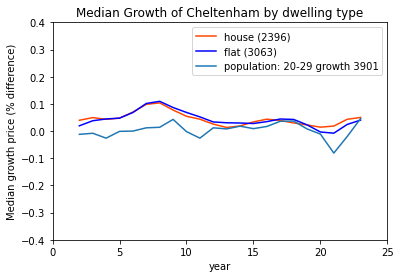

33 have chosen suburb:  Clayton


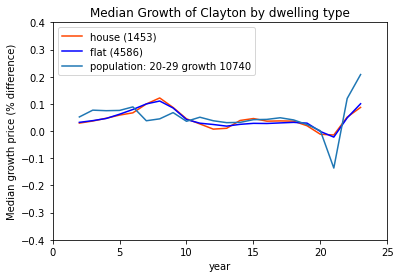

34 have chosen suburb:  Coburg-Pascoe Vale South


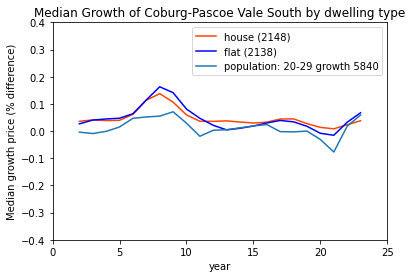

35 have chosen suburb:  Collingwood-Abbotsford


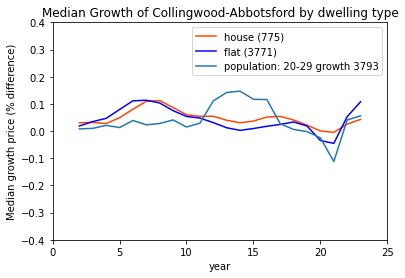

36 have chosen suburb:  Corio


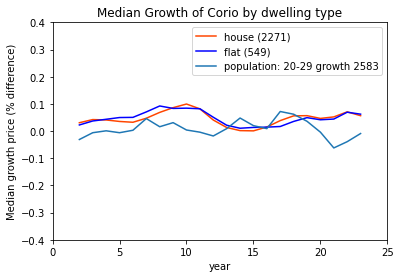

37 have chosen suburb:  Craigieburn


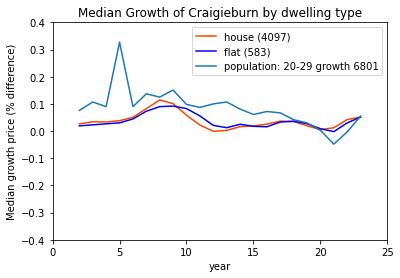

38 have chosen suburb:  Cranbourne


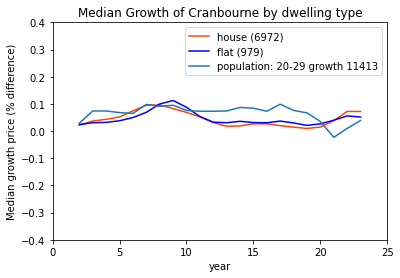

39 have chosen suburb:  Croydon-Lilydale


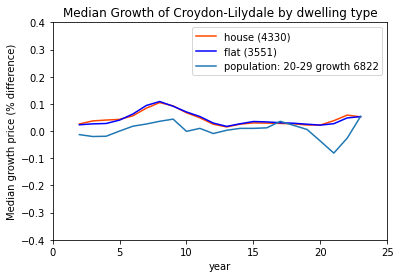

In [172]:
THRESH = 100
SUBURB = 3

for i in range(30, 40):
    print(i, "", end="")
    plot_suburb(suburbs[i], THRESH, columns=["population: 20-29 growth"], show=True, save=False)

### Investigating below threshod

In [33]:
curated[["economic: trimmed mean quarterly", "year groups"]].value_counts().reset_index().sort_values(by="year groups")

,economic: trimmed mean quarterly,year groups,0
36,0.650000,2.0,1
24,0.675000,2.0,52
20,0.675000,2.0,229
29,0.700000,3.0,1
34,0.800000,3.0,1
23,0.675000,3.0,52
21,0.675000,3.0,228
15,0.675000,4.0,281
28,0.633333,5.0,2
14,0.625000,5.0,281


In [34]:
values = curated[["economic: trimmed mean quarterly", "year groups"]].value_counts().reset_index().sort_values(by="year groups")
values[values[0] > 5]

,economic: trimmed mean quarterly,year groups,0
24,0.675,2.0,52
20,0.675,2.0,229
23,0.675,3.0,52
21,0.675,3.0,228
15,0.675,4.0,281
14,0.625,5.0,281
19,0.725,6.0,230
26,0.725,6.0,52
13,0.900,7.0,282
12,1.050,8.0,282


In [65]:
(curated["housing: count"] <= 300).sum()

161

In [84]:
curated.groupby("year groups")["economic: trimmed mean quarterly"].apply(lambda x: round(x ,3))

/tmp/ipykernel_226715/3457393879.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  curated.groupby("year groups")["economic: trimmed mean quarterly"].apply(lambda x: round(x ,3))


1        0.675
2        0.675
3        0.675
4        0.625
5        0.725
         ...  
21989    0.375
21990    0.300
21991    0.650
21992    1.625
21993    1.025
Name: economic: trimmed mean quarterly, Length: 20719, dtype: float64

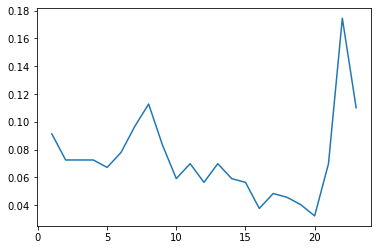

In [101]:
# time mask
time_mask = ((curated["year groups"] == 8))

# get the filtered plot
inflation_plot_df = curated.drop_duplicates(subset="year groups").sort_values(by = "year groups")

# get the mean
inflation_ratio = curated["housing: median growth"][time_mask].mean() / inflation_plot_df["economic: trimmed mean quarterly"][inflation_plot_df["year groups"] == 8].mean()

x = inflation_plot_df["year groups"].values
y = inflation_plot_df["economic: trimmed mean quarterly"].values * inflation_ratio

plt.plot(x, y)